## Imports

In [1]:
!pip install pandas
!pip install statistics
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [58]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [62]:
%%html
<style>
table {float:left;}
</style>

**Problem statement: Rank 5 pitchers with pitcher IDs from 90000 - 900004 from best to worst, based on pitch level data like whether a pitch is a ball, strike, or a swinging strike, or if the batter contact on the pitch was good or bad quality.**

Based on domain knowledge, we infer the following with respect to the data available to us:

- Ball is not desirable for a pitcher. (For a good pitcher, `B = 0` desirable).
- Strike is desirable for pitcher. (For a good pitcher, `S = 1` desirable)
- Swinging strike good for pitcher. (For a good pitcher, `SS = 1` desirable)
- Bad/Null contact quality desirable to pitchers. (For a good pitcher, `Contact quality = bad` desirable)

## Loading dataset

We load the dataset from test.csv and extract only the pitch level data attributes i.e. - `B`,`S`,`SS`,`CONTACT_QUALITY` and pitch IDs in `PITCHER_KEY`.

In [2]:
# Dataset
df_test = pd.read_csv('data/test.csv')
cols = ['PITCHER_KEY','B','S','SS','CONTACT_QUALITY']
data = pd.DataFrame(data=df_test[cols],columns=cols)

##### Let's check if our dataset contains any null or missing values.

In [3]:
data.isnull().sum()

PITCHER_KEY           0
B                     0
S                     0
SS                    0
CONTACT_QUALITY    7878
dtype: int64

The `CONTACT_QUALITY` column has about 7878 null values. Since both - bad and null values are desirable for pitchers in a game, we replace the null values with 'bad'.

In [4]:
data['CONTACT_QUALITY'] = data['CONTACT_QUALITY'].fillna('bad')

# Distribution of good and bad contact quality values now
data['CONTACT_QUALITY'].value_counts()

bad     8722
good     573
Name: CONTACT_QUALITY, dtype: int64

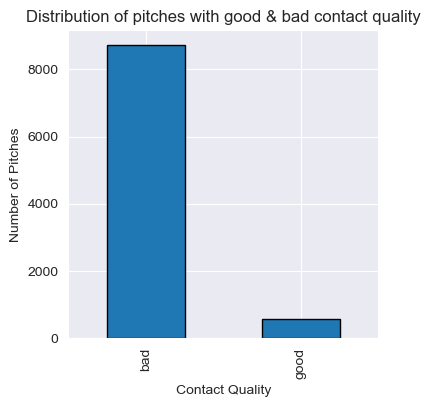

In [5]:
# Set graph style
sns.set_style("darkgrid")

# Graph pitch types
fig = plt.figure(figsize=(4,4))
data.CONTACT_QUALITY.value_counts().plot(kind="bar", edgecolor="k")
plt.title("Distribution of pitches with good & bad contact quality")
plt.xlabel("Contact Quality")
plt.ylabel("Number of Pitches")
plt.show()

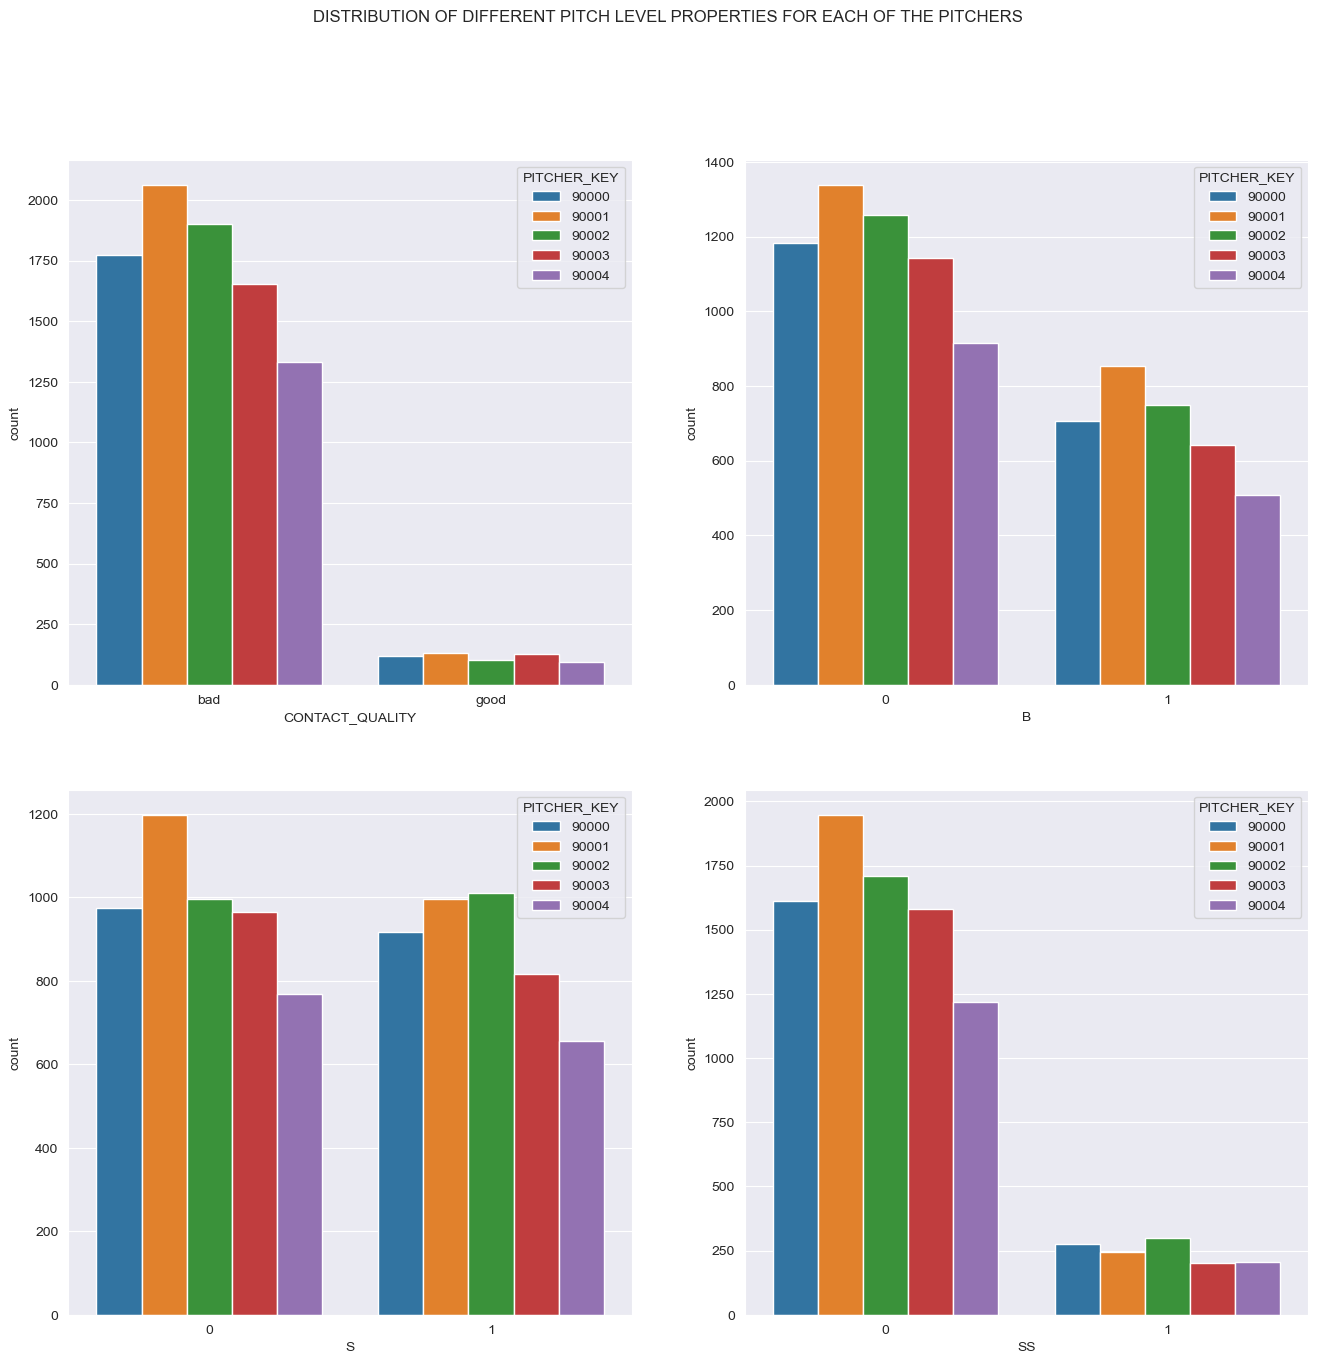

In [26]:
fig, axes = plt.subplots(2, 2,figsize=(16,15))

fig.suptitle('DISTRIBUTION OF DIFFERENT PITCH LEVEL PROPERTIES FOR EACH OF THE PITCHERS')

# Contact quality distribution for each pitcher
sns.countplot(ax=axes[0,0],data=data, x="CONTACT_QUALITY",hue="PITCHER_KEY",palette='tab10')

# Distribution of balls given by each pitcher
sns.countplot(ax=axes[0,1],data=data, x="B",hue="PITCHER_KEY",palette='tab10')

# Distribution of strikes given by each pitcher
sns.countplot(ax=axes[1,0],data=data, x="S",hue="PITCHER_KEY",palette='tab10')

# Distribution of swinging strikes given by each pitcher
sns.countplot(ax=axes[1,1],data=data, x="SS",hue="PITCHER_KEY",palette='tab10')
plt.show()

**From the charts above:**
- Pitcher 90002 has delivered the most strikes and swinging strikes.
- Pitcher 90001's pitches have received the most bad quality contacts, but that is not necessarily more desirable than a strike.

In any baseball game, having a strike is desirable for any pitcher. Therefore, I will be selecting all the instances where strikes or swinging strikes have occurred.<br>

We will be using these rows as the primary criteria in ranking the 5 pitchers from best to worst, based on the count of strikes delivered by each pitcher.<br>

The pitcher with the most strikes will be ranked as best, and one with the least strikes, the worst.

In [63]:
# Selecting all the instances with strikes or swinging strikes

df1 = data.loc[(data['S'] == 1) | (data['SS'] == 1)]

In [64]:
# Number of strikes/swinging strikes delivered by each of the pitchers

df1['PITCHER_KEY'].value_counts(ascending=False)

90002    1010
90001     995
90000     916
90003     817
90004     655
Name: PITCHER_KEY, dtype: int64

**Based on the above, following are the ranks of the 5 pitchers from best to worst**

Rank |Pitcher ID 
:----|----
1|90002
2|90001
3|90000
4|90003
5|90004